Accuracy Score: 89.16042569964524
[[1622    0]
 [ 275  640]]


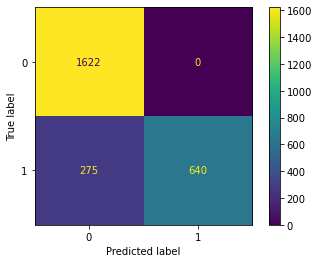

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from random import randint as ri
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
%matplotlib inline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore')


data = pd.read_csv('flight3.csv')

features = data[["N_Traffic","NE_Traffic","E_Traffic","SE_Traffic","S_Traffic","SW_Traffic","W_Traffic","NW_Traffic","Clogging?"]]

d = {'Yes': 1, 'No': 0}

features = features.replace({'S_Traffic': d})
features = features.replace({'N_Traffic': d})
features = features.replace({'E_Traffic': d})
features = features.replace({'W_Traffic': d})
features = features.replace({'Clogging?': d})
features = features.replace({'NE_Traffic': d})
features = features.replace({'SE_Traffic': d})
features = features.replace({'SW_Traffic': d})
features = features.replace({'NW_Traffic': d})

X, y = features[features.columns[:-1]], features['Clogging?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.98, random_state = ri(1, 50))


# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

clf = LogisticRegression(random_state = ri(1, 50))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print(cm)
x = plot_confusion_matrix(clf, X_test, y_test)
plt.savefig('Logistic Regression.jpg')
plt.show()

In [2]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1582
           1       0.97      0.98      0.97       877

    accuracy                           0.98      2459
   macro avg       0.98      0.98      0.98      2459
weighted avg       0.98      0.98      0.98      2459

